In [1]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
# path_train=working_directory+'/finance2_train.csv'
# path_test=working_directory+'/finance2_test.csv'
# path_submit=working_directory+'/finance2_submit.csv'

#データフレームの生成
# df_train=hist_prices_cal
# df_test=pd.read_csv(path_test)
# df_submit=pd.read_csv(path_submit)

In [2]:
 pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=62a91e2187c88967ec497796ef63e2ab42fdcfe3b1d39d3d01a73e5311794435
  Stored in directory: /Users/naokimaruoka/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [22]:
import yfinance as yf
data = yf.download('SPY AAPL', period='7d', interval = "1d")

[*********************100%***********************]  2 of 2 completed


In [23]:
data

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2021-12-02  163.759995  457.399994  163.759995  457.399994  164.199997   
2021-12-03  161.839996  453.420013  161.839996  453.420013  164.960007   
2021-12-06  165.320007  458.790009  165.320007  458.790009  167.879898   
2021-12-07  171.179993  468.279999  171.179993  468.279999  171.580002   
2021-12-08  175.080002  469.519989  175.080002  469.519989  175.960007   
2021-12-09  174.559998  466.350006  174.559998  466.350006  176.750000   
2021-12-10  179.449997  470.739990  179.449997  470.739990  179.630005   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2021-12-02  459.070007  157.800003  450.309998  158.735001  450.730011   
2021-12-03  460.299988  159.720001  448.920013  164.020004  459.170013   
2021-12-06  460.790009  164.279999  453.559998  164.289993  456.130005   
2021-12-07  468.880005  168.339996  458.654602  169.080002  464.410004   
2021-12-08  470.000000  170.699997  466.829987  172.125000  468.700012   
2021-12-09  469.629089  173.919998  466.140015  174.910004  468.149994   
2021-12-10  470.890015  174.690002  466.524994  175.205002  469.230011   

               Volume             
                 AAPL        SPY  
Date                              
2021-12-02  136739174  127637758  
2021-12-03  118023116  137331647  
2021-12-06  107496982   98977532  
2021-12-07  120405352   95484688  
2021-12-08  116998901   72238777  
2021-12-09  108157647   61272568  
2021-12-10  110986702   68978383

In [53]:
#　証券コード　Securities code
SecCode='9202'+'.T'

In [54]:
# 期間の指定
# preriod='120d' #1d 1日
# preriod='1mo' #1mo １ヶ月
preriod='1y' #1y 1年
# preriod='ytd' #当会計年度
# preriod='max' #max 全てのデータ

In [55]:
#取得する足の長さ
# interval='1m' # 1分足
# interval='1h' #１時間足
interval='1d'
# interval='1mo' #月足

In [56]:

data2 = yf.download(SecCode, period=preriod, interval = interval)

[*********************100%***********************]  1 of 1 completed


In [57]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,2381.0,2470.0,2359.0,2434.5,2434.5,9644600
2020-12-11,2433.0,2525.5,2418.5,2520.0,2520.0,9365500
2020-12-14,2490.5,2536.5,2457.0,2469.5,2469.5,23625600
2020-12-15,2305.0,2317.0,2275.5,2275.5,2275.5,32860900
2020-12-16,2283.5,2299.0,2260.0,2260.0,2260.0,6975700
...,...,...,...,...,...,...
2021-12-06,2300.0,2349.0,2296.5,2301.5,2301.5,6344800
2021-12-07,2371.5,2392.0,2330.0,2389.5,2389.5,6588400
2021-12-08,2405.0,2417.0,2374.0,2390.0,2390.0,4645100


In [58]:
hist_prices = data2[['High','Low','Open','Close']].copy()

In [59]:
hist_prices

,High,Low,Open,Close
Date,,,,
2020-12-10,2470.0,2359.0,2381.0,2434.5
2020-12-11,2525.5,2418.5,2433.0,2520.0
2020-12-14,2536.5,2457.0,2490.5,2469.5
2020-12-15,2317.0,2275.5,2305.0,2275.5
2020-12-16,2299.0,2260.0,2283.5,2260.0
...,...,...,...,...
2021-12-06,2349.0,2296.5,2300.0,2301.5
2021-12-07,2392.0,2330.0,2371.5,2389.5
2021-12-08,2417.0,2374.0,2405.0,2390.0


<AxesSubplot:xlabel='Date'>

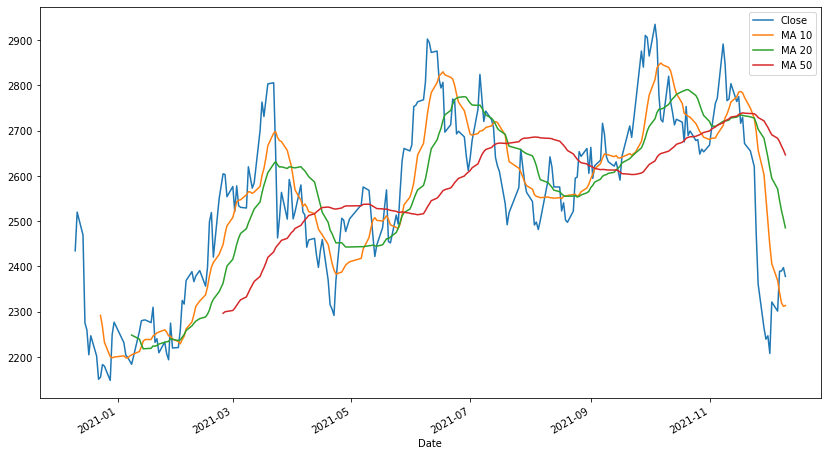

In [60]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    hist_prices[column_name]=hist_prices['Close'].rolling(window=ma).mean()
    
hist_prices[['Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(14,8))